In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'./csv/placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
#gradient descent function
def gradient_descent(m, b, points, L):
    m_grad = 0
    b_grad = 0
    
    for i in range(len(points)):
        x = points.iloc[i].cgpa
        y = points.iloc[i].package

        m_grad += -(2/len(points)) * x * (y - (m * x +b))
        b_grad += -(2/len(points)) * (y - (m * x +b))

    _m = m - m_grad * L
    _b = b - b_grad * L
    return _m, _b

In [10]:
m = 0
b = 0
L = 0.0001
#epochs
for i in range(500):
    m, b =gradient_descent(m, b, df, L)

In [11]:
#Slope:
m

0.42125948276751657

In [12]:
#Intercept
b

0.056541530803869866

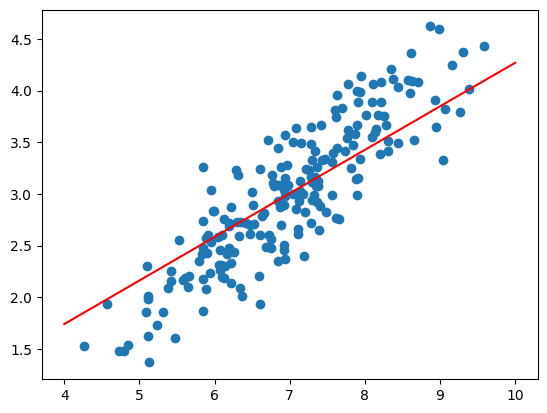

In [13]:
plt.scatter(df.cgpa, df.package)
plt.plot(list(range(4,11)), [m * x + b for x in range(4, 11)], color='r')
plt.show()

In [14]:
# r squared error
def calculate_r_squared(m, b, points):
    total_var = 0
    explained_var = 0
    y_mean=df['package'].mean()
    for i in range(len(points)):
        x = points.iloc[i].cgpa
        y = points.iloc[i].package
        y_pred = m * x + b
        
        explained_var += (y - y_pred)**2
        total_var += (y - y_mean)**2

    if(total_var != 0):
        r_squared = 1 - (explained_var / total_var)
    return r_squared

In [15]:
r_squared = calculate_r_squared(m, b, df)
r_squared

0.7229595040462871